# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: The t-test family
### VIDEO: Two-samples t-test
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

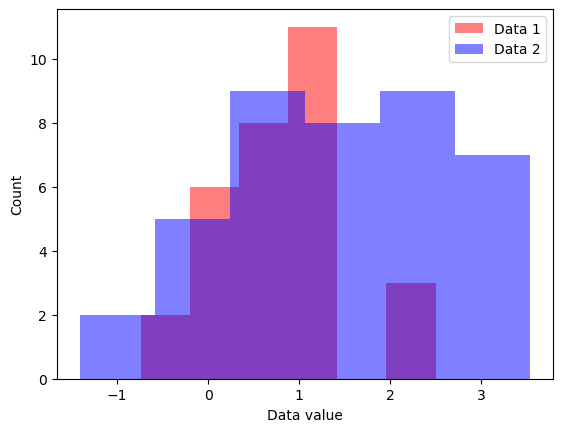

In [2]:
## generate the data

# parameters
# two samples of data - one with 30 elements and another with 40 elements
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2
# per above, the true mean difference between the populations is 0.2


# generate the data - note the samples here will not have the same means as the population above since they are samples and have sampling variability
data1 = mu1 + np.random.randn(n1) # we simulate sampling variability by generating random normally distributed numbers and adding them to the population mean.
data2 = mu2 + np.random.randn(n2)
# note that the std dev here is 1, which is 5x more than the mean difference of .2 of the populations

# show their histograms superimposed on each other (2) - we get some transparency passing in 4 numbers: r,g,b, and opacity
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1') # uses the Freedman-Diaconis rule ('fd') see \NOTES\DataVisualizations\Histograms.md - a widely used rule to determine optimal number of bins
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [3]:
## now for the t-test using stats package from scipy

# ttest_ind (for independent) indicates we're using unpaired samples in our t-test
# we also pass in equal_var=True to indicate that we are using samples with equal variance
t,p = stats.ttest_ind(data1,data2,equal_var=True)

df = n1+n2-2 # degrees of freedom
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = -2.44127, p=0.0172437


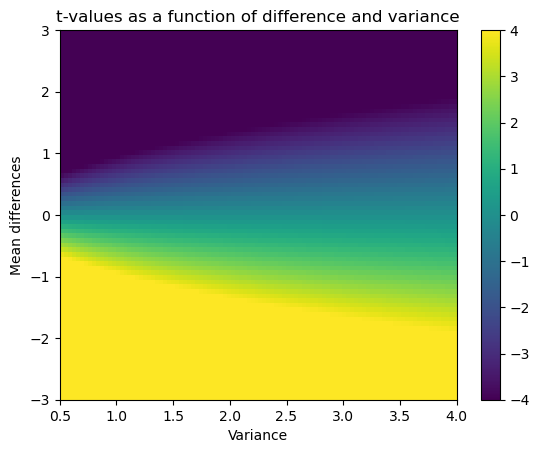

In [4]:
## a 2D space of t values in order to explore the importance of the numerator and denominator in t-test forumula

# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80) # numerator in two sample t-test formula, the range of the numerator (mean diff) can be from -3 to +3
pooledvar = np.linspace(.5,4,100) # denominator in two sample t-test, the pooled std devs go from .5 up to 4.

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        
        # t-value denominator
        df = n1 + n2 - 2 # degrees of freedom
        s  = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)
        
        # store the t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den # the 2 sample t-test formula

# the color in the plot corresponds to a t-value, the x-axis Variance is what is driving differences in the denominator of the t-test formula  
plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()